# Exercise 6
***Andrés Mauricio Obando Acevedo***

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [98]:
import pandas as pd
import numpy as np

In [99]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [100]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5061,7.4,0.60,0.26,7.30,0.070,36.0,121.0,0.99820,3.37,0.49,9.4,5,red
5120,6.8,0.61,0.04,1.50,0.057,5.0,10.0,0.99525,3.42,0.60,9.5,5,red
2177,6.0,0.34,0.24,5.40,0.060,23.0,126.0,0.99510,3.25,0.44,9.0,7,white
731,6.2,0.25,0.48,10.00,0.044,78.0,240.0,0.99655,3.25,0.47,9.5,6,white
6079,9.8,0.39,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4,5,red


# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [101]:
data[['quality','type']].groupby('quality').count()

,type
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


before aply a stadarized model, is important to know the distribution of data, let's see:

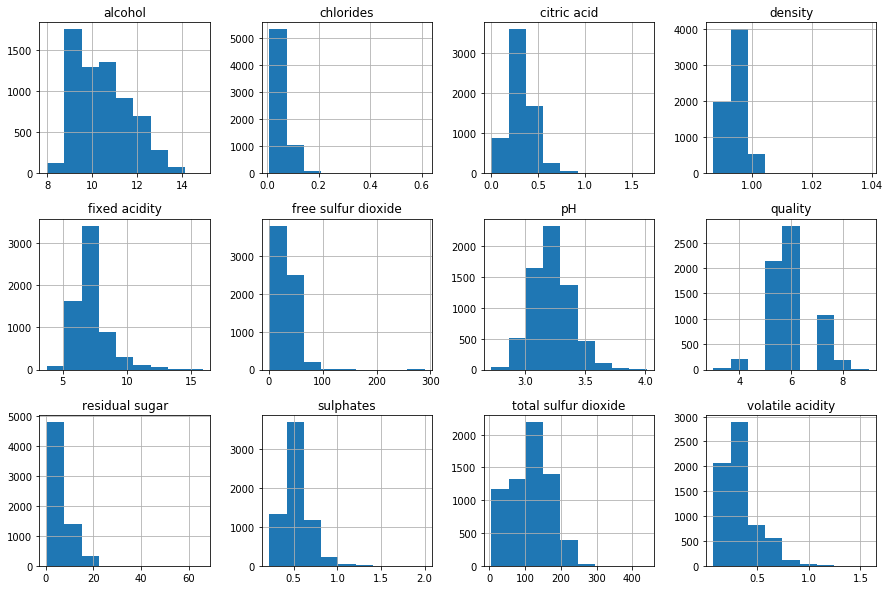

In [102]:
hist = data.hist(bins=9, layout=(3,4),figsize=(15,10))

We can observe on histograms, that the data are in differente range each one, some are in decimals, others in units or hundreds; but, there are not values with frecuencies anormaly, so it's possible and necesary stadarize the features with the scope of give all the same weight with independency of their magnitude.

**Standarize**

In [103]:
from sklearn.preprocessing import Normalizer
X = data.drop(['quality','type'],axis=1)
transformer = Normalizer().fit(X)
X_normalized=transformer.transform(X)

In [104]:
from sklearn.preprocessing import StandardScaler
X = data.drop(['quality','type'],axis=1)
transformer = StandardScaler().fit(X)
X_normalized=transformer.transform(X)

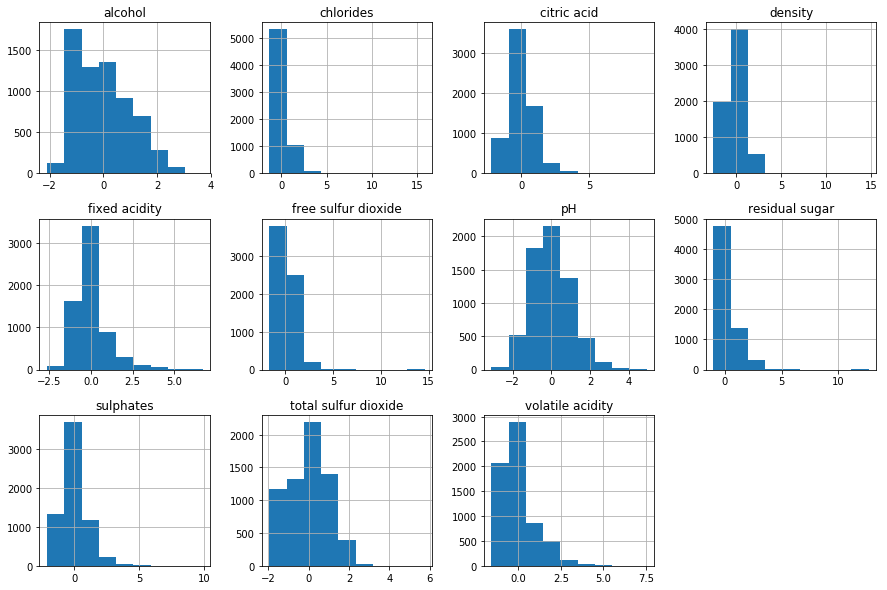

In [105]:
hist2 = pd.DataFrame(columns=X.columns, data=X_normalized).hist(bins=9, layout=(3,4),figsize=(15,10))

In [106]:
X_norm = pd.DataFrame(columns=X.columns, data=X_normalized)
X_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219


In [107]:
data2=pd.concat([X_norm,data[['quality','type']]], axis=1,join='inner')
data2.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2788,-0.243230,0.366496,0.697606,0.159070,0.284496,0.590188,1.066137,0.274598,-0.612663,0.058683,-0.915464,5,white
1674,-0.320370,-0.726906,-0.197054,0.726602,-0.286429,2.900303,1.278461,0.267928,0.506915,-0.613385,-0.160823,6,white
255,-0.397511,-0.483928,0.491146,-0.912936,-0.457706,0.815565,0.553022,-0.399085,0.631312,0.327510,-0.747766,8,white
4688,-0.397511,-1.091373,0.009406,1.483312,-0.600437,-0.705730,0.712265,0.654795,-2.105434,-1.151040,-1.250860,6,white
1393,-1.168917,-1.243235,-0.128234,-0.177246,-0.400614,-0.649386,-0.260885,-0.032228,0.569114,-0.747799,-0.999313,6,white


**Binary Target**

In [108]:
data2['quality2'] = data2['quality'] > 6
data2['quality2'] = data2['quality2'].map({True:1,False:0})

In [109]:
data_white=data2[data2['type']=='white']
data_red=data2[data2['type']=='red']
data_white.shape,data_red.shape

((4898, 14), (1599, 14))

**Spliting data on training and test**

In [110]:
from sklearn.svm import SVC # "Support Vector Classifier"
y_w = data_white['quality2']
X_w = data_white.drop(['quality','quality2','type'],axis=1)

y_r = data_red['quality2']
X_r = data_red.drop(['quality','quality2','type'],axis=1)

In [111]:
from sklearn.model_selection import train_test_split

#White Wine
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(
    X_w, y_w, test_size=0.30)

#Red Wine
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(
    X_r, y_r, test_size=0.30)

**Linear SVM**

**_White wine_**

In [112]:
clf_WW = SVC(kernel='linear')
clf_WW.fit(X_w_train, y_w_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
#Validating on test data
y_w_pred = clf_WW.predict(X_w_test)

**_Red wine_**

In [114]:
clf_rw = SVC(kernel='linear')
clf_rw.fit(X_r_train, y_r_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
#Validatin on test data
y_r_pred = clf_WW.predict(X_r_test)

# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


In [116]:
from sklearn.metrics import accuracy_score

Accuracy for linear SVM

In [117]:
w_acc_lin=accuracy_score(y_w_test, y_w_pred, normalize=True)
r_acc_lin=accuracy_score(y_r_test, y_r_pred, normalize=True)
w_acc_lin,r_acc_lin

(0.7891156462585034, 0.8520833333333333)

Now, let's try with differents kernels and compare the accuracy of each.

_White wine:_

In [118]:
kernels=['linear','poly', 'rbf', 'sigmoid']
Acc_val = []
for k in range(len(kernels)):
    clf_WW_r = SVC(kernel=kernels[k], gamma='auto') #Se agrega explicitamente la definición de gamma, para evitar un future warning
    clf_WW_r.fit(X_w_train, y_w_train)
    y_w_pred_r = clf_WW_r.predict(X_w_test)
    Accur=accuracy_score(y_w_test, y_w_pred_r, normalize=True)
    Acc_val.append(Accur)
    print('WW_Acc_'+kernels[k]+':',Accur)

WW_Acc_linear: 0.7891156462585034
WW_Acc_poly: 0.8163265306122449
WW_Acc_rbf: 0.8251700680272109
WW_Acc_sigmoid: 0.7149659863945578


_Red wine:_

In [119]:
Acc_val = []
for k in range(len(kernels)):
    clf_RW_r = SVC(kernel=kernels[k], gamma='auto') #Se agrega explicitamente la definición de gamma, para evitar un future warning
    clf_RW_r.fit(X_w_train, y_w_train)
    y_r_pred_r = clf_RW_r.predict(X_r_test)
    Accur = accuracy_score(y_r_test, y_r_pred_r, normalize=True)
    Acc_val.append(Accur)
    print('RW_Acc_'+kernels[k]+':',Accur)

RW_Acc_linear: 0.8520833333333333
RW_Acc_poly: 0.8166666666666667
RW_Acc_rbf: 0.8520833333333333
RW_Acc_sigmoid: 0.7729166666666667


# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

we can see the best models for both wine types is `rbf`

In [120]:
C = [0.1, 1, 10, 100, 1000]
gamma = [0.01, 0.001, 0.0001]

In [121]:
kernels='rbf'
cols=['wine','C','gamma1','Accuracy']
WineAcc=pd.DataFrame(columns=cols,data=[])
Acc_val=[]
k=0
#White Wine
for i in range(len(C)):
    for j in range(len(gamma)):
        clf_WW_r = SVC(kernel=kernels, C=C[i], gamma=gamma[j])
        clf_WW_r.fit(X_w_train, y_w_train)
        y_w_pred_r = clf_WW_r.predict(X_w_test)
        Accur=accuracy_score(y_w_test, y_w_pred_r, normalize=True)
        Acc_val.append(Accur)
        WineAcc.loc[k] = ['White',C[i],gamma[j],Accur]
        k+=1
#WineAcc

In [122]:
cols=['wine','C','gamma1','Accuracy']
Acc_val=[]
k=WineAcc.shape[0]
#Red Wine
for i in range(len(C)):
    for j in range(len(gamma)):
        clf_WW_r = SVC(kernel=kernels, C=C[i], gamma=gamma[j])
        clf_WW_r.fit(X_w_train, y_w_train)
        y_r_pred_r = clf_WW_r.predict(X_r_test)
        Accur=accuracy_score(y_r_test, y_r_pred_r, normalize=True)
        Acc_val.append(Accur)
        WineAcc.loc[k] = ['red',C[i],gamma[j],Accur]
        k+=1
WineAcc

,wine,C,gamma1,Accuracy
0,White,0.1,0.0100,0.789116
1,White,0.1,0.0010,0.789116
2,White,0.1,0.0001,0.789116
3,White,1.0,0.0100,0.792517
4,White,1.0,0.0010,0.789116
5,White,1.0,0.0001,0.789116
6,White,10.0,0.0100,0.826531
7,White,10.0,0.0010,0.789116
8,White,10.0,0.0001,0.789116
9,White,100.0,0.0100,0.825850


The best combination of arguments that gives the best performace is:

In [123]:
WW=WineAcc[WineAcc['wine']=='White']
RW=WineAcc[WineAcc['wine']=='red']
print(WW[WW['Accuracy']==np.max(WW['Accuracy'])],'\n','\n----------\n\n',RW[RW['Accuracy']==np.max(RW['Accuracy'])])

     wine       C  gamma1  Accuracy
12  White  1000.0    0.01  0.830612 
 
----------

    wine     C  gamma1  Accuracy
21  red  10.0    0.01  0.858333


# Exercise 6.5

Compare the results with other methods

Now, we compare the model with LOGIT regression

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
#White wine
logreg_w = LogisticRegression(solver='liblinear',C=1e9)
logreg_w.fit(X_w_train, y_w_train)
y_w_pred_log = logreg_w.predict(X_w_test)
accuracy_score(y_w_test, y_w_pred_log, normalize=True)

0.8027210884353742

In [126]:
#Red wine
logreg_r = LogisticRegression(solver='liblinear',C=1e9)
logreg_r.fit(X_r_train, y_r_train)
y_r_pred_log = logreg_r.predict(X_r_test)
accuracy_score(y_r_test, y_r_pred_log, normalize=True)

0.8770833333333333

**_Conclusion:_** For the white wine the best model is the SVM with the paramters founded in the previous point, but for the red wine the best model is the LOGIT regression, with best accuracy.

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
#White wine
linreg_w = LinearRegression(normalize=True)
linreg_w.fit(X_w_train, y_w_train)
y_w_pred_lin = linreg_w.predict(X_w_test)

In [129]:
#Red wine
linreg_r = LinearRegression(normalize=True)
linreg_r.fit(X_r_train, y_r_train)
y_r_pred_lin = linreg_r.predict(X_r_test)

Whit the model, let's analize the coeficients:

In [130]:
WW_Coef=pd.DataFrame(columns=X_w.columns,data=[linreg_w.coef_])
WW_Coef['intercept']=linreg_w.intercept_
WW_Coef

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
0,0.072709,-0.054722,-0.009723,0.145427,-0.010071,0.020614,-0.00779,-0.191081,0.056387,0.041558,0.080375,0.163811


In [131]:
RW_Coef=pd.DataFrame(columns=X_r.columns,data=[linreg_r.coef_])
RW_Coef['intercept']=linreg_r.intercept_
RW_Coef

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
0,0.032937,-0.032937,0.010996,0.11098,-0.021072,-0.005555,-0.04438,-0.103503,-0.013213,0.047863,0.088984,0.214975


**RMSE**

In [132]:
from sklearn import metrics
y_tr=y_w_test
y_pr=y_w_pred_lin
MSE_linreg_w = metrics.mean_squared_error(y_tr, y_pr)
print('RMSE:', np.sqrt(MSE_linreg_w))

RMSE: 0.3715109154426857


The RMSE say us, that for each prediction the spected error is 0,38 units.

# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [133]:
from sklearn.linear_model import Ridge

In [134]:
#White Wine
alpha=[0.1, 1]
cols=['wine','alpha','RMSE']
WWine_ridge=pd.DataFrame(columns=cols,data=[])
k=0
#White Wine
for i in range(len(alpha)):
    Wridgereg = Ridge(alpha=alpha[i], normalize=True)
    Wridgereg.fit(X_w_train, y_w_train)
    y_w_pred_ridge = Wridgereg.predict(X_w_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_w_test, y_w_pred_ridge))
    WWine_ridge.loc[k] = ['white',alpha[i],RMSE]
    k+=1
WWine_ridge

,wine,alpha,RMSE
0,white,0.1,0.372363
1,white,1.0,0.380043


Let's see the coeficients in comparisson with the linear model:

In [135]:
WW_Coef.loc[1]=np.append(Wridgereg.coef_, Wridgereg.intercept_)
WW_Coef.rename(index={0:'LOGIT', 1:'Ridge'}, inplace=True)
WW_Coef

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
LOGIT,0.072709,-0.054722,-0.009723,0.145427,-0.010071,0.020614,-0.007790,-0.191081,0.056387,0.041558,0.080375,0.163811
Ridge,-0.003179,-0.024650,-0.001762,0.006443,-0.033377,0.009668,-0.017393,-0.030119,0.013670,0.015197,0.061974,0.201100


In this case, the weigth of some features has been reduced, for example, the `residual sugar` that pass from 0.15 to 0.007

In [136]:
#Red Wine
alpha=[0.1, 1]
cols=['wine','alpha','RMSE']
RWine_ridge=pd.DataFrame(columns=cols,data=[])
k=0
for i in range(len(alpha)):
    Rridgereg = Ridge(alpha=alpha[i], normalize=True)
    Rridgereg.fit(X_r_train, y_r_train)
    y_r_pred_ridge = Rridgereg.predict(X_r_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_r_test, y_r_pred_ridge))
    RWine_ridge.loc[k] = ['red',alpha[i],RMSE]
    k+=1
RWine_ridge

,wine,alpha,RMSE
0,red,0.1,0.307538
1,red,1.0,0.316872


Let's see the coeficients in comparisson with the linear model:

In [137]:
RW_Coef.loc[1]=np.append(Rridgereg.coef_, Rridgereg.intercept_)
RW_Coef.rename(index={0:'Linear', 1:'Ridge'}, inplace=True)
RW_Coef

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
Linear,0.032937,-0.032937,0.010996,0.110980,-0.021072,-0.005555,-0.044380,-0.103503,-0.013213,0.047863,0.088984,0.214975
Ridge,0.009343,-0.025694,0.014955,0.033297,-0.010713,-0.009869,-0.027269,-0.039364,-0.008602,0.023250,0.059448,0.161555


In this case, as the above case, the coeficients has changed its weights too.

# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [138]:
from sklearn.linear_model import Lasso

In [139]:
#White Wine
alpha=[0.01,0.1, 1]
cols=['wine','alpha','RMSE']
WWine_lasso=pd.DataFrame(columns=cols,data=[])
k=0
for i in range(len(alpha)):
    Wlassoreg = Lasso(alpha=alpha[i], normalize=True)
    Wlassoreg.fit(X_w_train, y_w_train)
    y_w_pred_lasso = Wlassoreg.predict(X_w_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_w_test, y_w_pred_lasso))
    WWine_lasso.loc[k] = ['white',alpha[i],RMSE]
    k+=1
WWine_lasso

,wine,alpha,RMSE
0,white,0.01,0.408013
1,white,0.10,0.408013
2,white,1.00,0.408013


Let's see the coeficients in comparisson with the linear model:

In [140]:
WW_Coef.loc['Lasso']=np.append(Wlassoreg.coef_, Wlassoreg.intercept_)
WW_Coef

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
LOGIT,0.072709,-0.054722,-0.009723,0.145427,-0.010071,0.020614,-0.007790,-0.191081,0.056387,0.041558,0.080375,0.163811
Ridge,-0.003179,-0.024650,-0.001762,0.006443,-0.033377,0.009668,-0.017393,-0.030119,0.013670,0.015197,0.061974,0.201100
Lasso,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.218786


In this case, the weigth of all features were eliminated, and just remain the intercept.

In [141]:
#Red Wine
alpha=[0.01,0.1, 1]
cols=['wine','alpha','RMSE']
RWine_lasso=pd.DataFrame(columns=cols,data=[])
k=0
for i in range(len(alpha)):
    Rlassoreg = Lasso(alpha=alpha[i], normalize=True)
    Rlassoreg.fit(X_r_train, y_r_train)
    y_r_pred_lasso = Rlassoreg.predict(X_r_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_r_test, y_r_pred_lasso))
    RWine_lasso.loc[k] = ['white',alpha[i],RMSE]
    k+=1
RWine_lasso

,wine,alpha,RMSE
0,white,0.01,0.355446
1,white,0.10,0.355446
2,white,1.00,0.355446


Let's see the coeficients in comparisson with the linear model:

In [142]:
RW_Coef.loc['Lasso']=np.append(Rlassoreg.coef_, Rlassoreg.intercept_)
RW_Coef

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
Linear,0.032937,-0.032937,0.010996,0.110980,-0.021072,-0.005555,-0.044380,-0.103503,-0.013213,0.047863,0.088984,0.214975
Ridge,0.009343,-0.025694,0.014955,0.033297,-0.010713,-0.009869,-0.027269,-0.039364,-0.008602,0.023250,0.059448,0.161555
Lasso,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.130474


At the same of the white wine, for the red wine the weigth of all features were eliminated, and just remain the intercept.

# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

In [143]:
from sklearn.metrics import f1_score

In [144]:
#White wine
logreg_w = LogisticRegression(solver='liblinear',C=1e9)
logreg_w.fit(X_w_train, y_w_train)
y_w_pred_log = logreg_w.predict(X_w_test)
f1_score(y_w_test, y_w_pred_log)

0.3722943722943723

In [145]:
WW_Coef_logit=pd.DataFrame(columns=X_w.columns,data=logreg_w.coef_)
WW_Coef_logit['intercept']=logreg_w.intercept_
WW_Coef_logit.rename(index={0:'LOGIT'}, inplace=True)
WW_Coef_logit

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
LOGIT,0.91437,-0.661451,-0.14661,1.524239,-0.453079,0.112133,0.066134,-2.198458,0.599085,0.337599,0.10023,-2.462115


with the coeficients from the LOGIT regression, we can indicate tha for 1 unit increase on the some features, is associated with some increase or decrease in the logodds of quality2. The increase or decrease on the log-odss is the value of the each coeficient, positive is increase, negative is decrease. For example, one unir increase on chlorides, is associated with 0.42 units decreases on log-odds of quality2.

In the model for the white wine, for a zero value of all features, the log-odds is -2.43 units

In [146]:
#Red wine
logreg_r = LogisticRegression(solver='liblinear',C=1e9)
logreg_r.fit(X_r_train, y_r_train)
y_r_pred_log = logreg_r.predict(X_r_test)
f1_score(y_r_test, y_r_pred_log)

0.43809523809523815

In [147]:
RW_Coef_logit=pd.DataFrame(columns=X_w.columns,data=logreg_r.coef_)
RW_Coef_logit['intercept']=logreg_r.intercept_
RW_Coef_logit.rename(index={0:'LOGIT'}, inplace=True)
RW_Coef_logit

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
LOGIT,0.212329,-0.48528,0.039427,0.955224,-0.251318,0.264282,-1.086433,-0.651675,-0.16539,0.510715,0.898598,-2.573286


The same conclusion of the white wine coeficients, but with differents values.

In the model for the red wine, for a zero value of all features, the log-odds is -2.33 units

# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

Usando regularización

In [148]:
#White Wine
C=[0.01,0.1, 1]
penalty=['l1','l2']
cols=['wine','model','C','penalty','F1']
WWine_log_reg=pd.DataFrame(columns=cols,data=[])
k=0
for i in range(len(C)):
    for j in range(len(penalty)):
        W_log_reg = LogisticRegression(C=C[i], penalty=penalty[j],multi_class='ovr',solver='liblinear')
        W_log_reg.fit(X_w_train, y_w_train)
        y_w_log_pred_reg = W_log_reg.predict(X_w_test)
        F1=f1_score(y_w_test, y_w_log_pred_reg)
        WWine_log_reg.loc[k] = ['white','Regul'+str(k),C[i],penalty[j],F1]
        #Coeficientes:
        WW_Coef_logit.loc['Regul'+str(k)]=np.append(W_log_reg.coef_, W_log_reg.intercept_)
        k+=1
WWine_log_reg

,wine,model,C,penalty,F1
0,white,Regul0,0.01,l1,0.288557
1,white,Regul1,0.01,l2,0.372414
2,white,Regul2,0.10,l1,0.373576
3,white,Regul3,0.10,l2,0.380313
4,white,Regul4,1.00,l1,0.370370
5,white,Regul5,1.00,l2,0.370370


Let's see the coeficients in comparisson with the LOGIT model:

In [149]:
WW_Coef_logit

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
LOGIT,0.914370,-0.661451,-0.146610,1.524239,-0.453079,0.112133,0.066134,-2.198458,0.599085,0.337599,0.100230,-2.462115
Regul0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002689,0.000000,0.691441,-1.241031
Regul1,0.208936,-0.120429,-0.082256,0.143581,-0.072139,0.146348,-0.285397,-0.131126,0.210001,0.205028,0.653799,-1.146174
Regul2,0.195091,-0.530517,-0.084730,0.411666,-0.344650,0.118857,-0.037070,-0.381424,0.226430,0.184192,0.837774,-1.914513
Regul3,0.418267,-0.513190,-0.134636,0.632093,-0.354654,0.175149,-0.139755,-0.716784,0.335263,0.241598,0.679668,-1.897951
Regul4,0.826868,-0.641519,-0.138841,1.383533,-0.439354,0.121620,0.031716,-1.963287,0.554025,0.319214,0.192196,-2.381235
Regul5,0.781736,-0.641045,-0.145986,1.291913,-0.451629,0.128316,0.019076,-1.802408,0.529056,0.311626,0.264001,-2.340863


The case when parameters C=0.01 and penalty=l1, produce all features coeficients equal zero, except the intercept, but this cmbination have the worst f1 score. The others cases has variation on the coeficients.

In [150]:
#Red Wine
C=[0.01,0.1, 1]
penalty=['l1','l2']
cols=['wine','model','C','penalty','F1']
RWine_log_reg=pd.DataFrame(columns=cols,data=[])
k=0
for i in range(len(C)):
    for j in range(len(penalty)):
        R_log_reg = LogisticRegression(C=C[i], penalty=penalty[j],multi_class='ovr',solver='liblinear')
        R_log_reg.fit(X_w_train, y_w_train)
        y_r_log_pred_reg = R_log_reg.predict(X_r_test)
        F1=f1_score(y_r_test, y_r_log_pred_reg)
        RWine_log_reg.loc[k] = ['red','Regul'+str(k),C[i],penalty[j],F1]
        #Coeficientes:
        RW_Coef_logit.loc['Regul'+str(k)]=np.append(R_log_reg.coef_, R_log_reg.intercept_)
        k+=1
RWine_log_reg

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,wine,model,C,penalty,F1
0,red,Regul0,0.01,l1,0.220000
1,red,Regul1,0.01,l2,0.522293
2,red,Regul2,0.10,l1,0.129870
3,red,Regul3,0.10,l2,0.128205
4,red,Regul4,1.00,l1,0.000000
5,red,Regul5,1.00,l2,0.000000


Let's see the coeficients in comparisson with the LOGIT model:

In [151]:
RW_Coef_logit

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
LOGIT,0.212329,-0.485280,0.039427,0.955224,-0.251318,0.264282,-1.086433,-0.651675,-0.165390,0.510715,0.898598,-2.573286
Regul0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002714,0.000000,0.691398,-1.241013
Regul1,0.208936,-0.120429,-0.082256,0.143581,-0.072139,0.146348,-0.285397,-0.131126,0.210001,0.205028,0.653799,-1.146174
Regul2,0.195315,-0.530504,-0.084726,0.412042,-0.344648,0.118824,-0.037002,-0.382063,0.226547,0.184237,0.837483,-1.914657
Regul3,0.418267,-0.513190,-0.134636,0.632093,-0.354654,0.175149,-0.139755,-0.716784,0.335263,0.241598,0.679668,-1.897951
Regul4,0.827065,-0.641526,-0.138835,1.383894,-0.439420,0.121602,0.031774,-1.963888,0.554126,0.319272,0.191936,-2.381408
Regul5,0.781736,-0.641045,-0.145986,1.291913,-0.451629,0.128316,0.019076,-1.802408,0.529056,0.311626,0.264001,-2.340863


For the red wine, the same combination of parameters of the white wine causes the all coeficients be zero, except the intercept, but the F1 isn't the worst, but neither is a good F1 score.